In [1]:
import tensorflow as tf

In [7]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
import os
import zipfile

local_zip = '/content/drive/My Drive/Contest/dataset-2.zip'
zip = zipfile.ZipFile(local_zip, 'r')
zip.extractall('/tmp')
zip.close()

In [9]:
base_dir = '/tmp/dataset-2'

train_dir = '/tmp/dataset-2/train_set'
validation_dir = '/tmp/dataset-2/test_set'

# Directory with our training cat/dog pictures
train_cats_dir = '/tmp/dataset-2/train_set/cats'
train_bananas_dir = '/tmp/dataset-2/train_set/bananas'
train_palms_dir = '/tmp/dataset-2/train_set/palms'

# Directory with our validation cat/dog pictures
validation_cats_dir = '/tmp/dataset-2/test_set/cats'
validation_bananas_dir = '/tmp/dataset-2/test_set/bananas'
validation_palms_dir = '/tmp/dataset-2/test_set/palms'

In [10]:
train_cat_fnames = os.listdir( train_cats_dir )
train_banana_fnames = os.listdir( train_bananas_dir )
train_palm_fnames = os.listdir( train_palms_dir )

print(train_cat_fnames[:10])
print(train_banana_fnames[:10])
print(train_palm_fnames[:10])

['cat.62.jpg', 'cat.4019.jpg', 'cat.183.jpg', 'cat.95.jpg', 'cat.59.jpg', 'cat.1.jpg', 'cat.92.jpg', 'cat.13.jpg', 'cat.104.jpg', 'cat.102.jpg']
['banana6.png', 'banana29.png', 'banana27.png', 'banana9.png', 'banana38.png', 'banana14.png', 'banana43.png', 'banana12.png', 'banana33.png', 'banana45.png']
['palm1928hdh.jpg', 'jacbowbcwpalm.jpg', 'open-palm-female-hand-left-human-palm-png-clipart.jpg', 'hand-1598179__340.jpg', '1200-90372037-solid-life-line-on-hand.jpg', 'hand-1701989__340123.jpg', 'my-hand.jpg', 'F1.large.jpg', 'Palm-Hand-Slapping-1024x681.jpg', 'hand-1701962__340.jpg']


In [11]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training banana images :', len(os.listdir(train_bananas_dir)))
print('Total training palm images :', len(os.listdir(train_palms_dir)))
tot = len(os.listdir(train_cats_dir))+len(os.listdir(train_bananas_dir))+len(os.listdir(train_palms_dir))
print('Total No. of training examples :', tot)
print()
print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation banana images :', len(os.listdir(validation_bananas_dir)))
print('Total validation palm images :', len(os.listdir(validation_palms_dir)))
tot = len(os.listdir(validation_cats_dir))+len(os.listdir(validation_bananas_dir))+len(os.listdir(validation_palms_dir))
print('Total No. of validation examples :',tot)

Total training cat images : 54
Total training banana images : 48
Total training palm images : 48
Total No. of training examples : 150

Total validation cat images : 86
Total validation banana images : 87
Total validation palm images : 87
Total No. of validation examples : 260


In [12]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#To output images in a 6x4 configuration
nrows = 6
ncols = 4

pic_index = 0 # Index for iterating over images

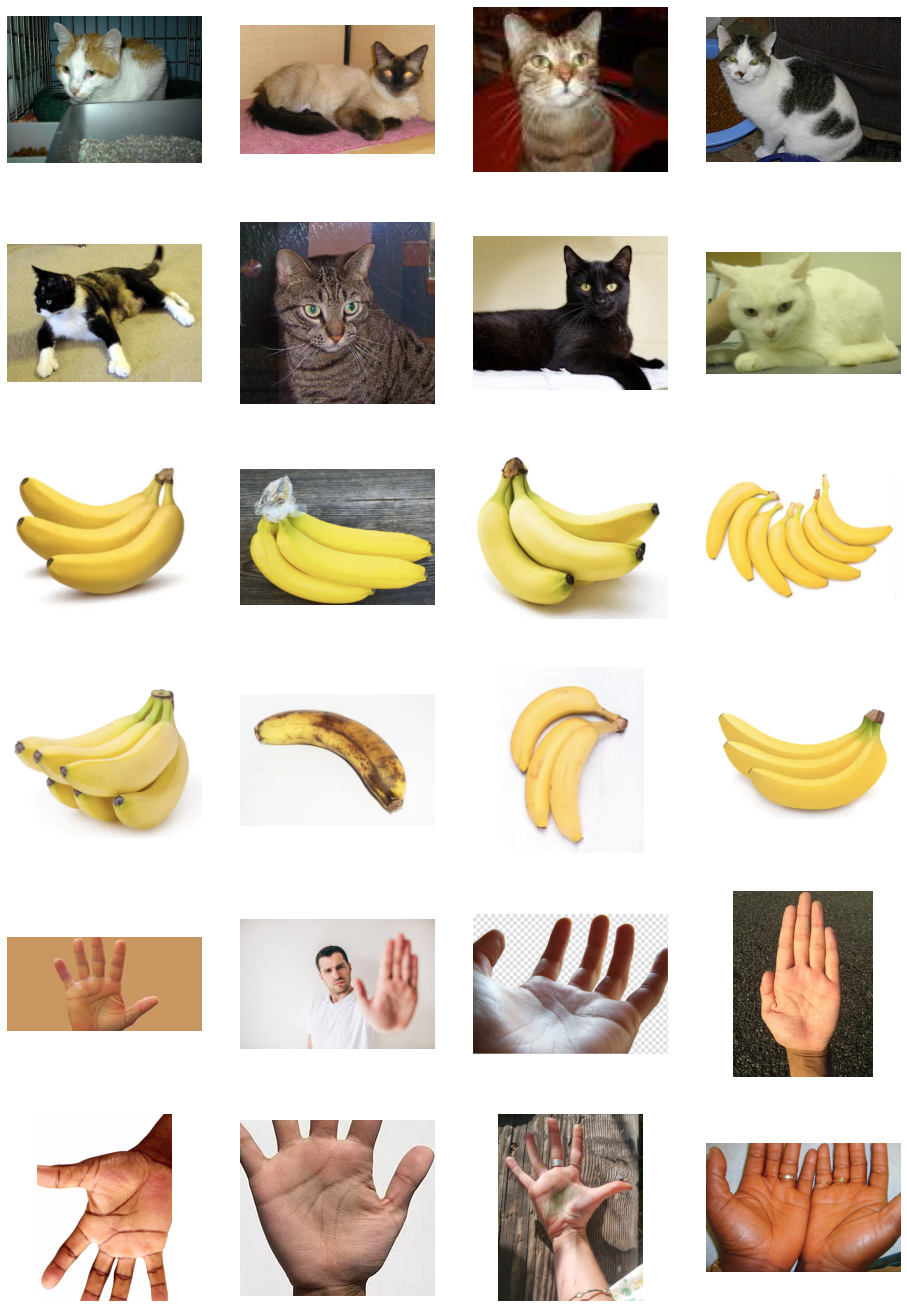

In [13]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_banana_pix = [os.path.join(train_bananas_dir, fname) 
                for fname in train_banana_fnames[ pic_index-8:pic_index]
               ]

next_palm_pix = [os.path.join(train_palms_dir, fname) 
                for fname in train_palm_fnames[ pic_index-8:pic_index]
               ]             

for i, img_path in enumerate(next_cat_pix+next_banana_pix+next_palm_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [15]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale = 1.0/255.0,
                               rotation_range = 80,
                               shear_range = 0.3,
                               horizontal_flip = True,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               zoom_range = 0.2)

val_gen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_gen.flow_from_directory(train_dir,
                                                target_size = (150,150),
                                                class_mode = 'categorical',
                                                batch_size = 10)
validation_generator = val_gen.flow_from_directory(validation_dir,
                                                target_size = (150,150),
                                                class_mode = 'categorical',
                                                batch_size = 1)

class MyThresholdCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= 0.9:
            self.model.stop_training = True

Found 150 images belonging to 3 classes.
Found 260 images belonging to 3 classes.


In [17]:
myt = MyThresholdCallback()

model_history = model.fit_generator(train_generator,
                    validation_data = validation_generator,
                    epochs = 25, callbacks=[myt])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
15/15 [==============================] - 16s 1s/step - loss: 3.4374 - accuracy: 0.3667 - val_loss: 1.0806 - val_accuracy: 0.3538
Epoch 2/25
15/15 [==============================] - 16s 1s/step - loss: 1.0130 - accuracy: 0.4600 - val_loss: 0.8740 - val_accuracy: 0.6385
Epoch 3/25
15/15 [==============================] - 16s 1s/step - loss: 0.8408 - accuracy: 0.5867 - val_loss: 0.8974 - val_accuracy: 0.4654
Epoch 4/25
15/15 [==============================] - 16s 1s/step - loss: 0.6955 - accuracy: 0.7267 - val_loss: 0.9362 - val_accuracy: 0.3962
Epoch 5/25
15/15 [==============================] - 16s 1s/step - loss: 0.6830 - accuracy: 0.6867 - val_loss: 0.6130 - val_accuracy: 0.6923
Epoch 6/25
15/15 [==============================] - 16s 1s/step - loss: 0.5221 - accuracy: 0.7933 - val_loss: 0.5709 - val_accuracy: 0.8385
Epoch 7/25
15/15 [==============================] - 16s 1s/step - loss: 0.4644 - acc

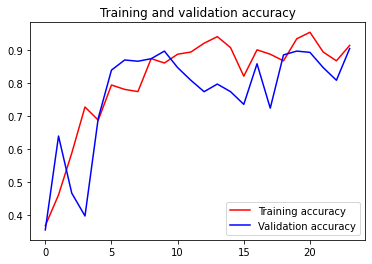

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [22]:
model.save('/content/drive/My Drive/Contest')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Contest/assets


Saving cat.69.jpg to cat.69 (1).jpg
probability of image being a Banana: 6.0182146e-18
probability of image being a Cat: 1.0
probability of image being a Human Palm: 1.2055966e-28


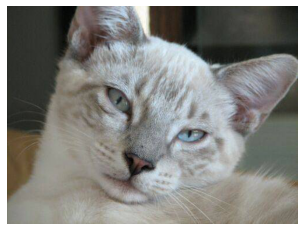

In [21]:
import numpy as np

from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow import keras

#model_temp = keras.models.load_model('/content/drive/My Drive/Contest')

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  fig = plt.gcf()
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images)
  #classes2 = model_temp.predict(images)
  #print(classes2- classes)
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.axis('Off')

  print("probability of image being a Banana:",classes[0][0])
  print("probability of image being a Cat:", classes[0][1])
  print("probability of image being a Human Palm:",classes[0][2])

plt.show()